In [1]:
pip install ipynb

Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np
import matplotlib
from ipynb.fs.full.GAfuncs import InitialGen, MySort, SelCross, Mutation, Elite
from numpy.random import default_rng
rng = np.random.default_rng()

In [11]:
def CostFunc(pop):
    import numpy as np
    x=np.sum([pop.transpose()**2],axis=1) # sphere
    x = np.sum([pop.transpose() ** 2], axis=1)  # sphere
    return x[0] # output should be array

In [12]:
lb=[0, 0]
ub=[1, 1]
nvar=len(ub) # number of variables
n=50      # number of population
MaxIter=1000   # maximum iteration
elit=0.05    # elitism
mut=0.1      # mutation

In [4]:
#### This is a minimization problem
# initialize
pop = InitialGen(n,ub,lb)# new population
# fitness function
fit = CostFunc(pop)# fitness
# sort
fit, pop = MySort(fit,pop)
bestval=fit[0]
bestsol=pop[0]
vals=[bestval]
print(bestval)
print(bestsol)
# start of iteration
for i in range(0,MaxIter):
    offspring = SelCross(fit,pop) # Random Selection and Crossover
    offspring=Elite(offspring,pop,elit)# Ellitism
    popnew = Mutation (offspring, mut, ub, lb)# Mutation
    # Evaluate Fitness
    fit = CostFunc(popnew)
    fit, pop = MySort(fit,popnew)
    if fit[0]<bestval:
        bestval=fit[0]
        bestsol=pop[0]
    vals = np.concatenate((vals, [bestval]))
print('best value is:', bestval)
print('best solution is:', bestsol)

0.027877169396641692
[0.16496978 0.02573212]
best value is: 2.085923193888542e-05
best solution is: [0.00258887 0.00376258]


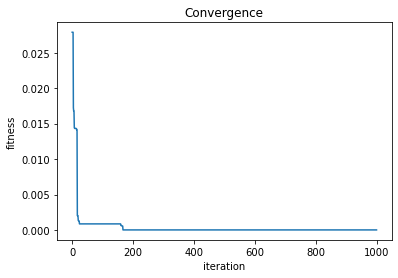

In [13]:
import matplotlib.pyplot as plt
plt.plot(vals)
plt.ylabel('fitness')
plt.xlabel('iteration')
plt.title('Convergence')
plt.show()